<a href="https://colab.research.google.com/github/alvinfranklyndavis/Project2023_v3/blob/main/Draw1_Predictive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CELL 1.1: Package Installation

# Upgrade pip and install required packages
!pip install -U pip
!pip install -U pandas gdown numpy matplotlib scikit-learn xgboost shap imbalanced-learn black


In [23]:
# CELL 1.2: Cloning GitHub Repository

# Git Configuration
!git config --global user.name "alvinfranklyndavis"
!git config --global user.email "alvinfranklyndavis@gmail.com"

# Cloning the Repository
# For a public repository:
!git clone https://github.com/alvinfranklyndavis/Project2023_v3.git

# For a private repository (use your PAT in place of YOUR_TOKEN_HERE):
# !git clone https://YOUR_TOKEN_HERE@github.com/YourUsername/YourRepository.git


fatal: destination path 'Project2023_v3' already exists and is not an empty directory.


In [3]:
# CELL 1.3: Loading and Inspecting Data

import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
# Define the base directory path for loading and saving
base_dir = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model/Draw1_Predictive_Model/'

# Function to load a dataset
def load_dataset(filename):
    full_path = base_dir + filename
    return pd.read_csv(full_path)

# Function to save a dataset
def save_dataset(df, filename):
    full_path = base_dir + filename
    df.to_csv(full_path, index=False)

# Load datasets
train_test_data = load_dataset('A_Initial_Train_Test_Data.csv')
unseen_data = load_dataset('B_Initial_Unseen_Data.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
## Surveillence checks on both datasets

# Load datasets
train_test_data = load_dataset('A_Initial_Train_Test_Data.csv')
unseen_data = load_dataset('B_Initial_Unseen_Data.csv')

# Print the first few rows of the datasets
print("First 5 rows of Training/Testing Data:\n", train_test_data.head())
print("\nFirst 5 rows of Unseen Data:\n", unseen_data.head())

# Dataset dimensions
print("\nShape of Training/Testing Data:", train_test_data.shape)
print("Shape of Unseen Data:", unseen_data.shape)

# Summary statistics
print("\nSummary Statistics of Training/Testing Data:\n", train_test_data.describe())
print("\nSummary Statistics of Unseen Data:\n", unseen_data.describe())

# Data types of columns
print("\nData Types in Training/Testing Data:\n", train_test_data.dtypes)
print("\nData Types in Unseen Data:\n", unseen_data.dtypes)

# Check for missing values
print("\nMissing values in Training/Testing Data:\n", train_test_data.isnull().sum())
print("\nMissing values in Unseen Data:\n", unseen_data.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows in Training/Testing Data:", train_test_data.duplicated().sum())
print("Duplicate rows in Unseen Data:", unseen_data.duplicated().sum())


First 5 rows of Training/Testing Data:
    Row Number  Data_Type  Draw1  DR1_Prev_Week  DR1_2Weeks  DR1_Prev_Entry  \
0           1          1     19              7          27              23   
1           2          1     31             11           1               9   
2           3          1     15             19          21              12   
3           4          1     31             35          18              35   
4           5          0      0              0           0               0   

   DR1_Prev_Entry-2  DR1_Mov_Avg  DR1_Vert_Avg  Draw2  ...  6 Cat in Bag  \
0                32           27            17     14  ...             0   
1                33           21             6      3  ...             0   
2                35           23            20      9  ...             0   
3                23           29            26     21  ...             0   
4                 0            0             0      0  ...             0   

   6 Fish Guts  6 Gold Sack  6 Mon

Missing values in training/testing data:
 Row Number                0
Data_Type                 0
Draw1                     0
DR1_Prev_Week             0
DR1_2Weeks                0
                         ..
7 Hog and Knife           0
7 Sunset Drive            0
7 Tiger Hunting           0
9 Clear or dirty water    0
9 Cow eating Grass        0
Length: 129, dtype: int64
Data types in training/testing data:
 Row Number                int64
Data_Type                 int64
Draw1                     int64
DR1_Prev_Week             int64
DR1_2Weeks                int64
                          ...  
7 Hog and Knife           int64
7 Sunset Drive            int64
7 Tiger Hunting           int64
9 Clear or dirty water    int64
9 Cow eating Grass        int64
Length: 129, dtype: object


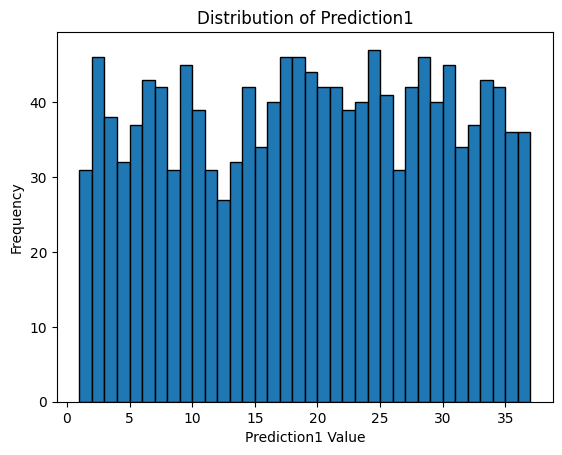

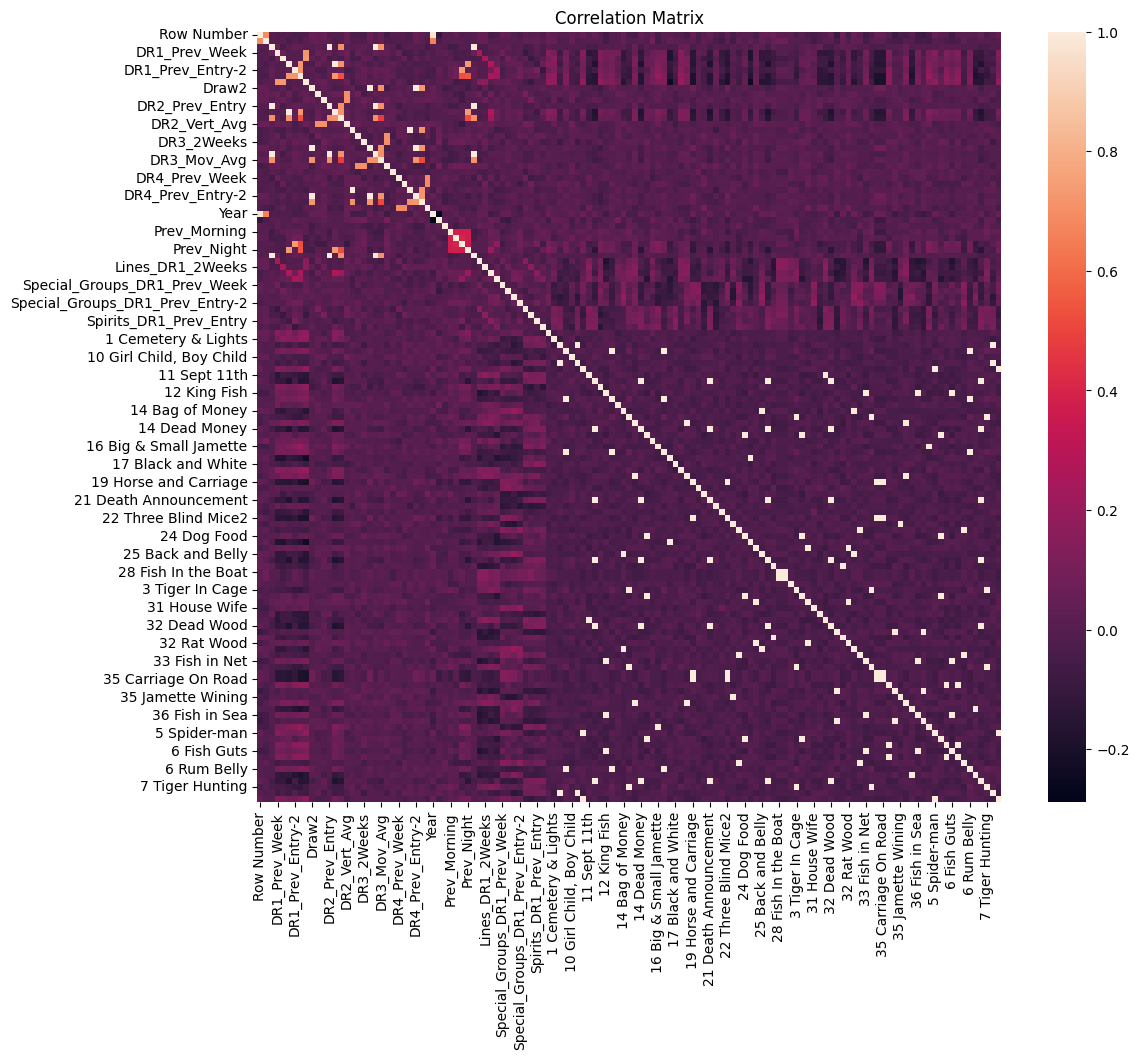

In [5]:
# CELL 1.4: Enhanced Cleaning and Feature Engineering

# Remove rows where 'Prediction1' is zero in the training/testing dataset
train_test_data = train_test_data[train_test_data['Prediction1'] != 0]

# Remove rows where 'Draw1' is zero in the unseen dataset
unseen_data = unseen_data[unseen_data['Draw1'] != 0]

# Data Cleaning

# Check for missing values
missing_values = train_test_data.isnull().sum()
print("Missing values in training/testing data:\n", missing_values)

# [Add code to handle missing values if any]

# Check for inconsistencies in data types
print("Data types in training/testing data:\n", train_test_data.dtypes)

# [Make any necessary adjustments based on data type inconsistencies]

# Save the intermediate datasets
train_test_data.to_csv('/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model/Draw1_Predictive_Model/C_Intermediate_Train_Test_Data.csv', index=False)
unseen_data.to_csv('/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model/Draw1_Predictive_Model/D_Intermediate_Unseen_Data.csv', index=False)

# Reanalyze the distribution of 'Prediction1'
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(train_test_data['Prediction1'], bins=range(1, 38), edgecolor='k')
plt.title('Distribution of Prediction1')
plt.xlabel('Prediction1 Value')
plt.ylabel('Frequency')
plt.show()

# Calculate the new correlation matrix
correlation_matrix = train_test_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

# Example: train_test_data.drop(['irrelevant_column1', 'irrelevant_column2'], axis=1, inplace=True)

# Save the final dataset for model training
train_test_data.to_csv('/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model/Draw1_Predictive_Model/C_Cleaned_Train_Test_Data.csv', index=False)
unseen_data.to_csv('/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model/Draw1_Predictive_Model/D_Cleaned_Unseen_Data.csv', index=False)


In [6]:
# CELL 2.1: List all columns for Training/Testing and Unseen Data to facilitate dropping of columns

# Assuming train_test_data and unseen_data are already loaded and have been cleaned
# To load datasets
train_test_data = load_dataset('C_Cleaned_Train_Test_Data.csv')
unseen_data = load_dataset('D_Cleaned_Unseen_Data.csv')

# Print the column names for the Training/Testing dataset
print("Training/Testing dataset columns:")
print(train_test_data.columns.tolist())

# Print the column names for the Unseen dataset
print("\nUnseen dataset columns:")
print(unseen_data.columns.tolist())


Training/Testing dataset columns:
['Row Number', 'Data_Type', 'Draw1', 'DR1_Prev_Week', 'DR1_2Weeks', 'DR1_Prev_Entry', 'DR1_Prev_Entry-2', 'DR1_Mov_Avg', 'DR1_Vert_Avg', 'Draw2', 'DR2_Prev_Week', 'DR2_2Weeks', 'DR2_Prev_Entry', 'DR2_Prev_Entry-2', 'DR2_Mov_Avg', 'DR2_Vert_Avg', 'Draw3', 'DR3_Prev_Week', 'DR3_2Weeks', 'DR3_Prev_Entry', 'DR3_Prev_Entry-2', 'DR3_Mov_Avg', 'DR3_Vert_Avg', 'Draw4', 'DR4_Prev_Week', 'DR4_2Weeks', 'DR4_Prev_Entry', 'DR4_Prev_Entry-2', 'DR4_Mov_Avg', 'DR4_Vert_Avg', 'Year', 'Month', 'Day', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening', 'Prev_Night', 'Prediction1', 'Lines_DR1_Prev_Week', 'Lines_DR1_2Weeks', 'Lines_DR1_Prev_Entry', 'Lines_DR1_Prev_Entry-2', 'Special_Groups_DR1_Prev_Week', 'Special_Groups_DR1_2Weeks', 'Special_Groups_DR1_Prev_Entry', 'Special_Groups_DR1_Prev_Entry-2', 'Spirits_DR1_Prev_Week', 'Spirits_DR1_2Weeks', 'Spirits_DR1_Prev_Entry', 'Spirits_DR1_Prev_Entry-2', '1 Bottle & Spoon', '1 Cemetery & Lights', '1 King and I', '1 Rum Bottle', '

In [7]:
# CELL 2.2a: Dropping "Sensitive" columns for Training/Testing and Unseen Data

# List of sensitive columns to drop (example names, replace with actual column names)
sensitive_columns_to_drop = ['Draw1', 'Draw2', 'Draw3', 'Draw4']

# Function to drop sensitive columns
def drop_sensitive_columns(df, columns_to_drop):
    df.drop(columns=columns_to_drop, inplace=True)

# Drop sensitive columns for Training/Testing Data
drop_sensitive_columns(train_test_data, sensitive_columns_to_drop)

# Drop sensitive columns for Unseen Data
drop_sensitive_columns(unseen_data, sensitive_columns_to_drop)


In [8]:
# CELL 2.2b: 'Keep Only' function for Training/Testing and Unseen Data

# Function to keep only the specified columns in the dataset
def keep_only(df, columns_to_keep):
    return df[columns_to_keep]

# Example usage of the keep_only function:
# List of columns to keep - modify this list as needed for your analysis
columns_to_keep = ['DR1_Prev_Week', 'DR1_2Weeks', 'DR1_Prev_Entry', 'DR1_Prev_Entry-2', 'DR1_Mov_Avg', 'DR1_Vert_Avg', 'Year', 'Month', 'Day', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening', 'Prev_Night', 'Prediction1', 'Lines_DR1_Prev_Week', 'Lines_DR1_2Weeks', 'Lines_DR1_Prev_Entry', 'Lines_DR1_Prev_Entry-2', 'Special_Groups_DR1_Prev_Week', 'Special_Groups_DR1_2Weeks', 'Special_Groups_DR1_Prev_Entry', 'Special_Groups_DR1_Prev_Entry-2', 'Spirits_DR1_Prev_Week', 'Spirits_DR1_2Weeks', 'Spirits_DR1_Prev_Entry', 'Spirits_DR1_Prev_Entry-2', '1 Bottle & Spoon', '1 Cemetery & Lights', '1 King and I', '1 Rum Bottle', '10 Girl Child, Boy Child', '10 King Kong', '10 Spider Monkey', '11 Sept 11th', '11 Sunset Drive2', '12 King Cobra', '12 King Fish', '13 Drunk and Spread Out', '13 Hard Back, Soft Back', '14 Bag of Money', '14 Blood Money', '14 Coil of Money', '14 Dead Money', '14 Dog Money', '15 Fowl Sickness', '16 Big & Small Jamette', '16 Drunk like Jamette', '16 Old Jamette', '17 Black and White', '18 Bridge & Water', '19 Horse Whip', '19 Horse and Carriage', '19 Straight from the Horse’s Mouth', '20 Sick like a Dog', '21 Death Announcement', '21 Food In Mouth', '21 Hog Mouth', '22 Three Blind Mice2', '23 Jamette In Hotel', '23 Money In Bank', '24 Dog Food', '24 Old Fowl', '24 Rat Looking For Goods', '25 Back and Belly', '26 Crowd from dead', '27 Monkey On Vine', '28 Fish In the Boat', '29 Rock D Boat', '29 Young Drunk', '3 Tiger In Cage', '30 Dog and Cat', '30 Tom and Jerry', '31 House Wife', '31 Parson Man, Parson Wife', '32 Bull Pistle', '32 Dead Wood', '32 Horse Wood', '32 Monkey Shrimps', '32 Rat Wood', '32 Wood in Belly', '33 Big Money, Small Money', '33 Fish in Net', '33 Lion In Net', '34 Three Blind Mice', '35 Carriage On Road', '35 Golden Cobra', '35 Horse on Track', '35 Jamette Wining', '35 Little Snake, Big Snake', '36 First and Last', '36 Fish in Sea', '36 Horse and Ass', '5 Parson Man and Wife', '5 Spider-man', '5 Worm On Fog', '6 Cat in Bag', '6 Fish Guts', '6 Gold Sack', '6 Money In Pocket', '6 Rum Belly', '7 Hog and Knife', '7 Sunset Drive', '7 Tiger Hunting', '9 Clear or dirty water', '9 Cow eating Grass']

# Apply 'keep only' for Training/Testing Data
train_test_data = keep_only(train_test_data, columns_to_keep)

# Apply 'keep only' for Unseen Data
unseen_data = keep_only(unseen_data, columns_to_keep)

# Save the datasets after applying 'Keep Only' function
save_dataset(train_test_data, 'E_Relevant_Col_Train_Test_Data.csv')
save_dataset(unseen_data, 'F_Relevant_Col_Unseen_Data.csv')


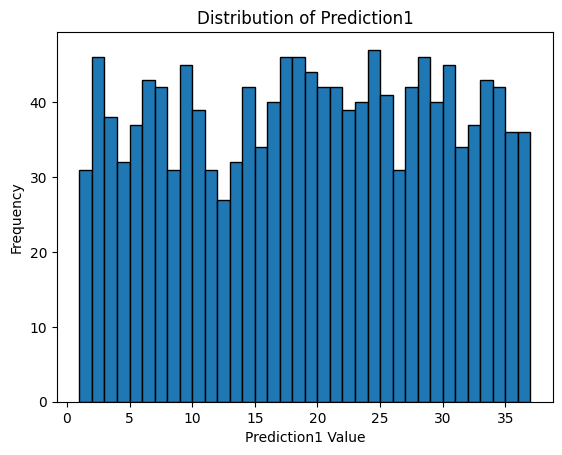

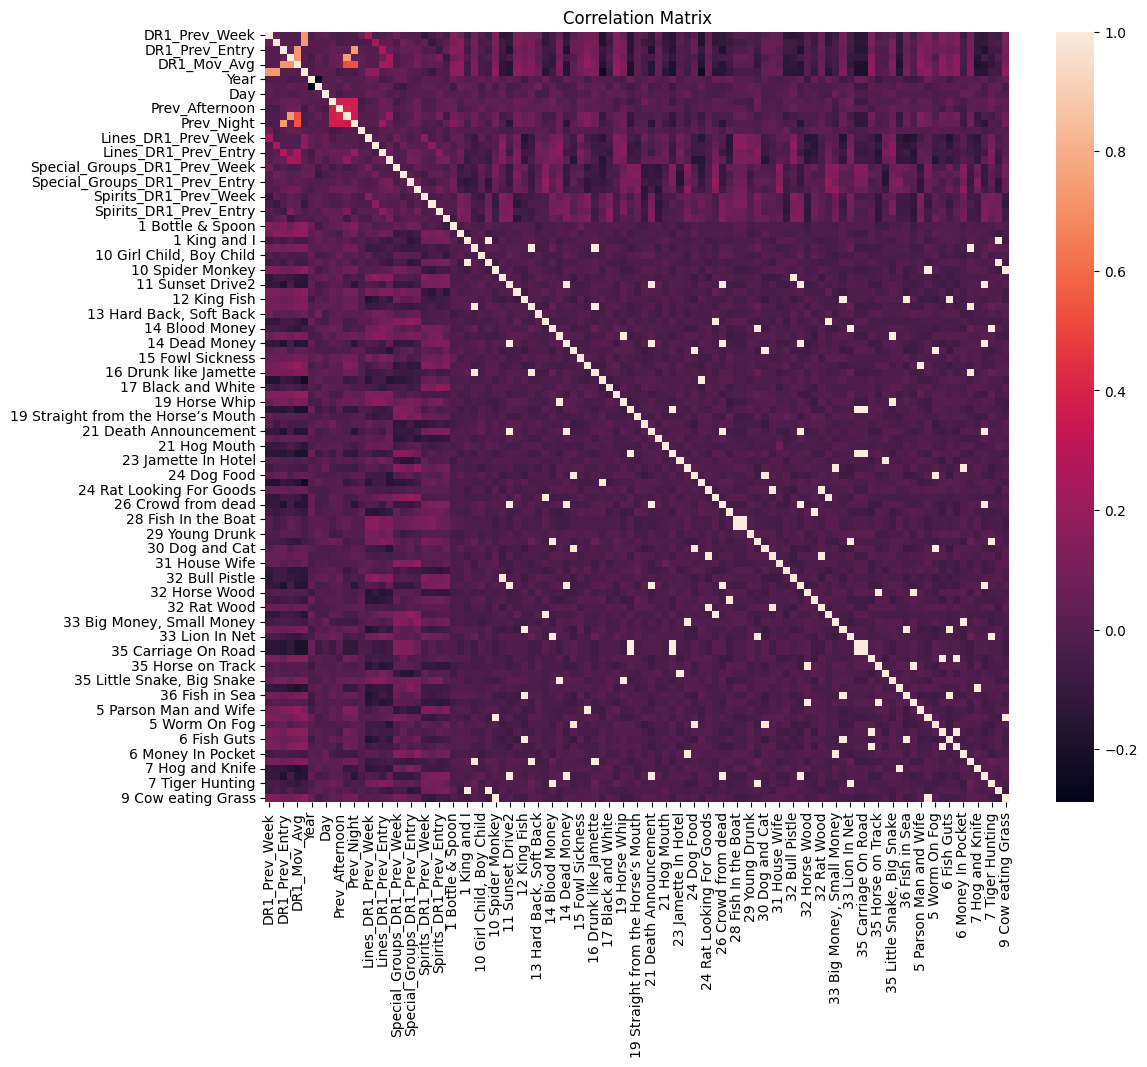

In [9]:
# CELL 2.3a: Re-run visualizations for Feature Selection

# Reanalyze the distribution of 'Prediction1'
import matplotlib.pyplot as plt

plt.hist(train_test_data['Prediction1'], bins=range(1, 38), edgecolor='k')
plt.title('Distribution of Prediction1')
plt.xlabel('Prediction1 Value')
plt.ylabel('Frequency')
plt.show()

# Calculate the new correlation matrix
correlation_matrix = train_test_data.corr()

# Assuming you have seaborn installed; if not, you can use plt.matshow()
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()


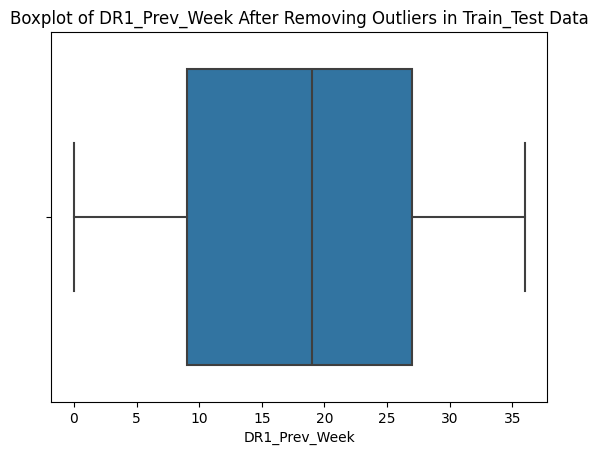

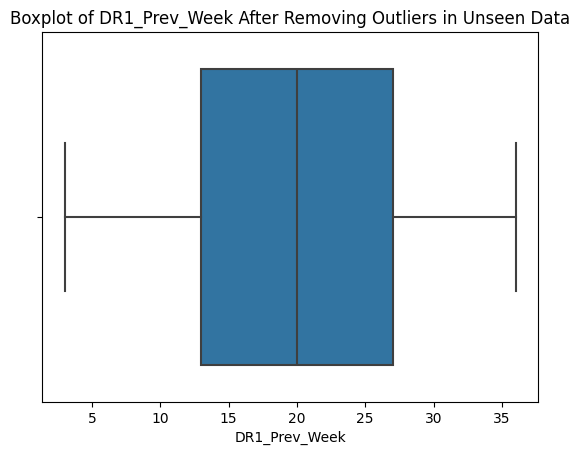

In [10]:
# Cell 2.3b: Handling Outliers

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to identify and remove outliers using IQR
def remove_outliers(data, feature):
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR

    return data.drop(data[(data[feature] < Q1 - outlier_step) |
                          (data[feature] > Q3 + outlier_step)].index)

# List of numeric features
numeric_features = ['DR1_Prev_Week', 'DR1_2Weeks', 'DR1_Prev_Entry', 'DR1_Prev_Entry-2', 'DR1_Mov_Avg', 'DR1_Vert_Avg',
                    'Year', 'Month', 'Day', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening', 'Prev_Night',
                    'Lines_DR1_Prev_Week', 'Lines_DR1_2Weeks', 'Lines_DR1_Prev_Entry', 'Lines_DR1_Prev_Entry-2',
                    'Special_Groups_DR1_Prev_Week', 'Special_Groups_DR1_2Weeks', 'Special_Groups_DR1_Prev_Entry',
                    'Special_Groups_DR1_Prev_Entry-2', 'Spirits_DR1_Prev_Week', 'Spirits_DR1_2Weeks',
                    'Spirits_DR1_Prev_Entry', 'Spirits_DR1_Prev_Entry-2']

# Create new datasets for the data with outliers removed
train_test_data_no_outliers = train_test_data.copy()
unseen_data_no_outliers = unseen_data.copy()

for feature in numeric_features:
    train_test_data_no_outliers = remove_outliers(train_test_data_no_outliers, feature)
    unseen_data_no_outliers = remove_outliers(unseen_data_no_outliers, feature)

# Visualization (Example for one feature, 'DR1_Prev_Week')
sns.boxplot(x=train_test_data_no_outliers['DR1_Prev_Week'])
plt.title('Boxplot of DR1_Prev_Week After Removing Outliers in Train_Test Data')
plt.show()

sns.boxplot(x=unseen_data_no_outliers['DR1_Prev_Week'])
plt.title('Boxplot of DR1_Prev_Week After Removing Outliers in Unseen Data')
plt.show()

# Save the new datasets
save_dataset(train_test_data_no_outliers, 'G_Remove_Outliers_Train_Test_Data.csv')
save_dataset(unseen_data_no_outliers, 'H_Remove_Outliers_Unseen_Data.csv')


In [11]:
# Cell 2.4a: Handling Skewness

# Import necessary libraries
import numpy as np
import pandas as pd

# Function to calculate skewness and apply transformations
def handle_skewness(data):
    # Calculate skewness
    skewness = data.skew().sort_values(ascending=False)

    # Identify skewed features (you can adjust the threshold)
    skewness = skewness[abs(skewness) > 0.5]

    # Apply log transformation for positive skewness
    for feature in skewness.index:
        if skewness[feature] > 0:
            data[feature] = np.log1p(data[feature])
        elif skewness[feature] < 0:  # For negative skewness, you might consider other transformations
            # Implement other transformations as needed
            pass

    return data

# Handling skewness in train_test_data_no_outliers
train_test_data_no_outliers = handle_skewness(train_test_data_no_outliers)

# Handling skewness in unseen_data_no_outliers
unseen_data_no_outliers = handle_skewness(unseen_data_no_outliers)

# Save the datasets after handling skewness
save_dataset(train_test_data_no_outliers, 'I_Skewness_Adjusted_Train_Test_Data.csv')
save_dataset(unseen_data_no_outliers, 'J_Skewness_Adjusted_Unseen_Data.csv')


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


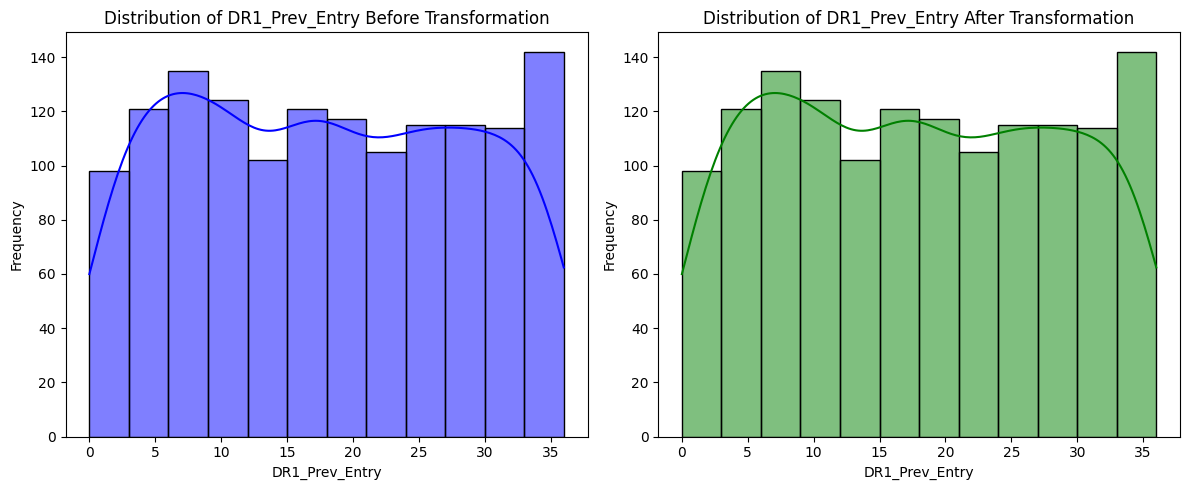

In [12]:
# Cell 2.4b: Visualizing Skewness

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_skewness(data_before, data_after, feature):
    """
    Visualize the skewness of a given feature before and after transformations.

    :param data_before: DataFrame before transformation
    :param data_after: DataFrame after transformation
    :param feature: The feature to visualize
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Before transformation
    sns.histplot(data_before[feature], kde=True, ax=ax[0], color='blue')
    ax[0].set_title(f'Distribution of {feature} Before Transformation')
    ax[0].set_xlabel(feature)
    ax[0].set_ylabel('Frequency')

    # After transformation
    sns.histplot(data_after[feature], kde=True, ax=ax[1], color='green')
    ax[1].set_title(f'Distribution of {feature} After Transformation')
    ax[1].set_xlabel(feature)
    ax[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Loading datasets for visualization (assuming the datasets are saved as CSV files)
train_test_data_before_skewness = load_dataset('G_Remove_Outliers_Train_Test_Data.csv')
train_test_data_after_skewness = load_dataset('I_Skewness_Adjusted_Train_Test_Data.csv')

# Example usage with a specific feature
visualize_skewness(train_test_data_before_skewness, train_test_data_after_skewness, 'DR1_Prev_Entry')


In [13]:
# Cell 2.5: Feature Engineering

# Import necessary libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Function to create interaction terms
def create_interaction_terms(data):
    data['interaction_DR1_Weeks'] = data['DR1_Prev_Week'] * data['DR1_2Weeks']
    data['interaction_Lines_DR1_Weeks'] = data['Lines_DR1_Prev_Week'] * data['Lines_DR1_2Weeks']
    data['interaction_Special_Groups_DR1_Weeks'] = data['Special_Groups_DR1_Prev_Week'] * data['Special_Groups_DR1_2Weeks']
    data['interaction_Spirits_DR1'] = data['Spirits_DR1_Prev_Week'] * data['Spirits_DR1_Prev_Entry']
    data['interaction_Prev_Periods'] = data['Prev_Morning'] * data['Prev_Afternoon'] * data['Prev_Evening']
    return data

# Function to add polynomial features
def add_polynomial_features(data, feature_list, degree=2):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(data[feature_list])
    # Naming polynomial features
    feature_names = [f"poly_{i+1}" for i in range(poly_features.shape[1])]
    data_poly = pd.DataFrame(poly_features, columns=feature_names)
    return pd.concat([data.reset_index(drop=True), data_poly], axis=1)

# Function for domain-specific transformations
def apply_domain_transformations(data):
    data['log_DR1_Prev_Entry'] = np.log1p(data['DR1_Prev_Entry'])
    # Additional transformations can be added here as needed
    return data

# Function for clustering-based features
def add_clustering_features(data, feature_list, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters)
    data['cluster'] = kmeans.fit_predict(data[feature_list])
    return data

# Applying feature engineering to both datasets
train_test_data_fe = train_test_data_no_outliers.copy()
unseen_data_fe = unseen_data_no_outliers.copy()

# Interaction Terms
train_test_data_fe = create_interaction_terms(train_test_data_fe)
unseen_data_fe = create_interaction_terms(unseen_data_fe)

# Polynomial Features - Adjust feature_list as per your dataset
feature_list = ['DR1_Prev_Week', 'DR1_2Weeks']
train_test_data_fe = add_polynomial_features(train_test_data_fe, feature_list)
unseen_data_fe = add_polynomial_features(unseen_data_fe, feature_list)

# Domain-Specific Transformations
train_test_data_fe = apply_domain_transformations(train_test_data_fe)
unseen_data_fe = apply_domain_transformations(unseen_data_fe)

# Clustering-Based Features - Adjust feature_list as per your dataset
feature_list = ['DR1_Prev_Week', 'DR1_2Weeks']
train_test_data_fe = add_clustering_features(train_test_data_fe, feature_list)
unseen_data_fe = add_clustering_features(unseen_data_fe, feature_list)

# Remember to check the new features and adjust any parameters based on your specific needs


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
# CELL 2.6: Splitting Data into Training, Validation, and Test Sets

from sklearn.model_selection import train_test_split

# Load the most recently processed dataset
full_data = load_dataset('I_Skewness_Adjusted_Train_Test_Data.csv')  # Adjust filename if different

# Separate the dataset into features and the target variable
X = full_data.drop('Prediction1', axis=1)  # Exclude 'Prediction1' which is the target
y = full_data['Prediction1']

# First, split into training and temporary datasets (combining validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Then, split the temporary dataset into validation and test datasets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# CELL: Dataset Shape Correction and Saving
import pandas as pd  # Ensure pandas is imported

# Ensure target datasets are 1D arrays and convert them to Pandas Series
y_train_series = pd.Series(y_train.ravel())
y_val_series = pd.Series(y_val.ravel())
y_test_series = pd.Series(y_test.ravel())

# If unseen_data_no_outliers has a target column, convert it to a 1D Series as well
unseen_target_series = pd.Series(unseen_data_no_outliers['Prediction1'].ravel())

# Saving the datasets
save_dataset(X_train, 'K_Train_Features.csv')
save_dataset(y_train_series, 'K_Train_Target.csv')
save_dataset(X_val, 'L_Val_Features.csv')
save_dataset(y_val_series, 'L_Val_Target.csv')
save_dataset(X_test, 'M_Test_Features.csv')
save_dataset(y_test_series, 'M_Test_Target.csv')
# Save unseen data (ensure to use the Series format for the target column if applicable)
save_dataset(unseen_data_no_outliers, 'J_Skewness_Adjusted_Unseen_Data.csv')

# Note: Uncomment and modify the lines related to unseen_data_no_outliers as necessary



In [15]:
# CELL 3.1: Model Training and Evaluation

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you've already loaded and split the data in previous cells
# If not, load the pre-split data here
X_train = load_dataset('K_Train_Features.csv')
y_train = load_dataset('K_Train_Target.csv')
X_val = load_dataset('L_Val_Features.csv')
y_val = load_dataset('L_Val_Target.csv')

# Initialize and train models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_val)
y_pred_xgb = xgb_model.predict(X_val)
y_pred_gbm = gbm_model.predict(X_val)

# Evaluate the models
mae_rf = mean_absolute_error(y_val, y_pred_rf)
rmse_rf = mean_squared_error(y_val, y_pred_rf, squared=False)
r2_rf = r2_score(y_val, y_pred_rf)

mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
rmse_xgb = mean_squared_error(y_val, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_val, y_pred_xgb)

mae_gbm = mean_absolute_error(y_val, y_pred_gbm)
rmse_gbm = mean_squared_error(y_val, y_pred_gbm, squared=False)
r2_gbm = r2_score(y_val, y_pred_gbm)

# Print model performance
print(f"RandomForestRegressor - MAE: {mae_rf}, RMSE: {rmse_rf}, R-squared: {r2_rf}")
print(f"XGBoost Regressor - MAE: {mae_xgb}, RMSE: {rmse_xgb}, R-squared: {r2_xgb}")
print(f"GBM Regressor - MAE: {mae_gbm}, RMSE: {rmse_gbm}, R-squared: {r2_gbm}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomForestRegressor - MAE: 8.955876777251184, RMSE: 10.522155929411216, R-squared: -0.04847855694615055
XGBoost Regressor - MAE: 9.443512655547444, RMSE: 11.513058015555313, R-squared: -0.2552535906917197
GBM Regressor - MAE: 9.158494165610005, RMSE: 10.792600403992068, R-squared: -0.10306798840231557


In [19]:
# CELL 3.2: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Hyperparameters grid for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],  # 'auto' is removed
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Hyperparameters grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.3, 0.7]
}

# Hyperparameters grid for GBM
param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search for RandomForest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Grid search for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Grid search for GBM
grid_search_gbm = GridSearchCV(estimator=gbm_model, param_grid=param_grid_gbm, cv=5, n_jobs=-1, verbose=2)
grid_search_gbm.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for RandomForest:", grid_search_rf.best_params_)
print("Best Score for RandomForest:", grid_search_rf.best_score_)
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Score for XGBoost:", grid_search_xgb.best_score_)
print("Best Parameters for GBM:", grid_search_gbm.best_params_)
print("Best Score for GBM:", grid_search_gbm.best_score_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
521 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters for RandomForest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score for RandomForest: -0.023619730213052657
Best Parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Score for XGBoost: -0.004430474985244071
Best Parameters for GBM: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Score for GBM: -0.0020217791205540568


In [22]:
# CELL 3.3: Retrain models with best parameters

# Set best parameters for RandomForest
rf_model.set_params(**{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200})
rf_model.fit(X_train, y_train)

# Set best parameters for XGBoost
xgb_model.set_params(**{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100})
xgb_model.fit(X_train, y_train)

# Set best parameters for GBM
gbm_model.set_params(**{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100})
gbm_model.fit(X_train, y_train)

# Make predictions and evaluate with the best parameters

# Predictions for RandomForest
y_pred_rf_best = rf_model.predict(X_val)
mae_rf_best = mean_absolute_error(y_val, y_pred_rf_best)
rmse_rf_best = mean_squared_error(y_val, y_pred_rf_best, squared=False)
r2_rf_best = r2_score(y_val, y_pred_rf_best)

# Predictions for XGBoost
y_pred_xgb_best = xgb_model.predict(X_val)
mae_xgb_best = mean_absolute_error(y_val, y_pred_xgb_best)
rmse_xgb_best = mean_squared_error(y_val, y_pred_xgb_best, squared=False)
r2_xgb_best = r2_score(y_val, y_pred_xgb_best)

# Predictions for GBM
y_pred_gbm_best = gbm_model.predict(X_val)
mae_gbm_best = mean_absolute_error(y_val, y_pred_gbm_best)
rmse_gbm_best = mean_squared_error(y_val, y_pred_gbm_best, squared=False)
r2_gbm_best = r2_score(y_val, y_pred_gbm_best)

# Print performance metrics for each model
print(f"Optimized RandomForestRegressor - MAE: {mae_rf_best}, RMSE: {rmse_rf_best}, R-squared: {r2_rf_best}")
print(f"Optimized XGBoost Regressor - MAE: {mae_xgb_best}, RMSE: {rmse_xgb_best}, R-squared: {r2_xgb_best}")
print(f"Optimized GBM Regressor - MAE: {mae_gbm_best}, RMSE: {rmse_gbm_best}, R-squared: {r2_gbm_best}")


Optimized RandomForestRegressor - MAE: 8.872008682576801, RMSE: 10.378725127175242, R-squared: -0.020089098543560224
Optimized XGBoost Regressor - MAE: 8.906476355276967, RMSE: 10.397236583567404, R-squared: -0.023731198080046534
Optimized GBM Regressor - MAE: 8.922720879725459, RMSE: 10.411386997164017, R-squared: -0.026519646234261396


In [16]:
# CELL 3.2: Feature Importance Analysis

# Train the original RandomForestRegressor model (if not already trained in CELL 3.1)
rf_regressor.fit(X_train, y_train)

# Get feature importances
importances = rf_regressor.feature_importances_

# Summarize feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances.sort_values('importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20))
plt.title('Top 20 Important Features')
plt.show()



NameError: name 'rf_regressor' is not defined

In [ ]:
# CELL 3.3: Feature Reduction and Model Retraining

# Assuming 'feature_importances' is a DataFrame with your features and their importance scores
threshold = 0.01  # Define a threshold for feature importance
important_features = feature_importances[feature_importances['importance'] > threshold]['feature']

# Print the features selected based on the threshold
print("Selected features after applying the threshold:")
print(important_features.tolist())

# Select only important features for training and validation sets
X_train_reduced = X_train[important_features]
X_val_reduced = X_val[important_features]

# Retrain the model on the reduced feature set
simplified_rf = RandomForestRegressor(n_estimators=50, min_samples_split=4, random_state=42)
simplified_rf.fit(X_train_reduced, y_train)
y_pred_reduced = simplified_rf.predict(X_val_reduced)

# Evaluate the model with reduced features
reduced_mae = mean_absolute_error(y_val, y_pred_reduced)
reduced_rmse = mean_squared_error(y_val, y_pred_reduced, squared=False)
reduced_r2 = r2_score(y_val, y_pred_reduced)

print(f"Reduced Feature Set - MAE: {reduced_mae}, RMSE: {reduced_rmse}, R-squared: {reduced_r2}")


In [ ]:
# CELL 3.4: Cross-Validation with Reduced Feature Set

from sklearn.model_selection import cross_val_score

# Initialize the model with optimal hyperparameters found previously (if any)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_regressor, X_train_reduced, y_train, cv=5, scoring='neg_mean_absolute_error')

# Calculate the mean and standard deviation of the cross-validation scores
cv_mae_mean = -cv_scores.mean()
cv_mae_std = cv_scores.std()

print(f"Cross-validated MAE: {cv_mae_mean} +/- {cv_mae_std}")


In [ ]:
# CELL 4.1: Hyperparameter Tuning with GridSearchCV or RandomizedSearchCV

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_reduced, y_train)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated MAE: {-grid_search.best_score_}")


In [ ]:
# CELL 4.2: Model Retraining with Optimal Hyperparameters

# Initialize the RandomForestRegressor with the best hyperparameters
optimal_rf = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)


# Retrain the model on the entire training set
optimal_rf.fit(X_train_reduced, y_train)

# Evaluate the model on the validation set
y_pred_optimal = optimal_rf.predict(X_val_reduced)

# Calculate the evaluation metrics
optimal_mae = mean_absolute_error(y_val, y_pred_optimal)
optimal_rmse = mean_squared_error(y_val, y_pred_optimal, squared=False)
optimal_r2 = r2_score(y_val, y_pred_optimal)

print(f"Optimal Model - MAE: {optimal_mae}, RMSE: {optimal_rmse}, R-squared: {optimal_r2}")


In [ ]:
# CELL 4.3: Removing the "Rakes" related columns and retrain the simplified RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the list of "Rakes" related columns to be removed
rakes_columns = [
    '1 Bottle & Spoon', '1 Cemetery & Lights', '1 King and I', '1 Rum Bottle',
    '10 Girl Child, Boy Child', '10 King Kong', '10 Spider Monkey', '11 Sept 11th',
    '11 Sunset Drive2', '12 King Cobra', '12 King Fish', '13 Drunk and Spread Out',
    '13 Hard Back, Soft Back', '14 Bag of Money', '14 Blood Money', '14 Coil of Money',
    '14 Dead Money', '14 Dog Money', '15 Fowl Sickness', '16 Big & Small Jamette',
    '16 Drunk like Jamette', '16 Old Jamette', '17 Black and White', '18 Bridge & Water',
    '19 Horse Whip', '19 Horse and Carriage', '19 Straight from the Horse’s Mouth',
    '20 Sick like a Dog', '21 Death Announcement', '21 Food In Mouth', '21 Hog Mouth',
    '22 Three Blind Mice2', '23 Jamette In Hotel', '23 Money In Bank', '24 Dog Food',
    '24 Old Fowl', '24 Rat Looking For Goods', '25 Back and Belly', '26 Crowd from dead',
    '27 Monkey On Vine', '28 Fish In the Boat', '29 Rock D Boat', '29 Young Drunk',
    '3 Tiger In Cage', '30 Dog and Cat', '30 Tom and Jerry', '31 House Wife',
    '31 Parson Man, Parson Wife', '32 Bull Pistle', '32 Dead Wood', '32 Horse Wood',
    '32 Monkey Shrimps', '32 Rat Wood', '32 Wood in Belly', '33 Big Money, Small Money',
    '33 Fish in Net', '33 Lion In Net', '34 Three Blind Mice', '35 Carriage On Road',
    '35 Golden Cobra', '35 Horse on Track', '35 Jamette Wining', '35 Little Snake, Big Snake',
    '36 First and Last', '36 Fish in Sea', '36 Horse and Ass', '5 Parson Man and Wife',
    '5 Spider-man', '5 Worm On Fog', '6 Cat in Bag', '6 Fish Guts', '6 Gold Sack',
    '6 Money In Pocket', '6 Rum Belly', '7 Hog and Knife', '7 Sunset Drive',
    '7 Tiger Hunting', '9 Clear or dirty water', '9 Cow eating Grass'
    # Add all "Rakes" related columns here
]

# Drop "Rakes" related columns from the datasets
X_train_reduced = X_train_reduced.drop(columns=rakes_columns, axis=1, errors='ignore')
X_val_reduced = X_val_reduced.drop(columns=rakes_columns, axis=1, errors='ignore')

# Retrain the simplified RandomForestRegressor model
simplified_rf = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)

# Train the model on the reduced feature set
simplified_rf.fit(X_train_reduced, y_train)

# Make predictions on the validation set
y_pred_simplified = simplified_rf.predict(X_val_reduced)

# Calculate the evaluation metrics
simplified_mae = mean_absolute_error(y_val, y_pred_simplified)
simplified_rmse = mean_squared_error(y_val, y_pred_simplified, squared=False)
simplified_r2 = r2_score(y_val, y_pred_simplified)

print(f"Simplified Model - MAE: {simplified_mae}, RMSE: {simplified_rmse}, R-squared: {simplified_r2}")


In [ ]:
# CELL 4.4: Regular RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train_reduced, y_train)

# Make predictions on the validation data
y_pred_rf = rf_model.predict(X_val_reduced)

# Evaluate the model
mae_rf = mean_absolute_error(y_val, y_pred_rf)
rmse_rf = mean_squared_error(y_val, y_pred_rf, squared=False)
r2_rf = r2_score(y_val, y_pred_rf)

print(f"RandomForestRegressor - MAE: {mae_rf}, RMSE: {rmse_rf}, R-squared: {r2_rf}")


In [ ]:
# CELL 4.5: XGBoost

from xgboost import XGBRegressor

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train_reduced, y_train)

# Make predictions on the validation data
y_pred_xgb = xgb_model.predict(X_val_reduced)

# Evaluate the model
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
rmse_xgb = mean_squared_error(y_val, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_val, y_pred_xgb)

print(f"XGBoost Regressor - MAE: {mae_xgb}, RMSE: {rmse_xgb}, R-squared: {r2_xgb}")


In [ ]:
# CELL 4.6: Gradient Boosting Machines (GBM)

from sklearn.ensemble import GradientBoostingRegressor

# Initialize the GBM Regressor
gbm_model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
gbm_model.fit(X_train_reduced, y_train)

# Make predictions on the validation data
y_pred_gbm = gbm_model.predict(X_val_reduced)

# Evaluate the model
mae_gbm = mean_absolute_error(y_val, y_pred_gbm)
rmse_gbm = mean_squared_error(y_val, y_pred_gbm, squared=False)
r2_gbm = r2_score(y_val, y_pred_gbm)

print(f"GBM Regressor - MAE: {mae_gbm}, RMSE: {rmse_gbm}, R-squared: {r2_gbm}")


In [ ]:
# CELL 4.7: LightGBM
import lightgbm as lgb

# Adapt feature names for LightGBM
X_train_lgbm = simplify_feature_names(X_train.copy())
X_val_lgbm = simplify_feature_names(X_val.copy())

# Train the LightGBM model
lgbm_model = lgb.LGBMRegressor(random_state=42)
lgbm_model.fit(X_train_lgbm, y_train)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_val_lgbm)

# Evaluate the model
mae_lgbm = mean_absolute_error(y_val, y_pred_lgbm)
rmse_lgbm = mean_squared_error(y_val, y_pred_lgbm, squared=False)
r2_lgbm = r2_score(y_val, y_pred_lgbm)

# Print performance
print(f"LightGBM Regressor - MAE: {mae_lgbm}, RMSE: {rmse_lgbm}, R-squared: {r2_lgbm
}")

In [ ]:
# CELL 5.1: Advanced Exploratory Data Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap: Detailed look at the correlation between features
plt.figure(figsize=(15, 10))
sns.heatmap(train_test_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Boxplots or Violin Plots
sns.boxplot(x='Prediction1', y='Spirits_DR1_Prev_Week', data=train_test_data)
plt.show()

sns.violinplot(x='Prediction1', y='Spirits_DR1_Prev_Week', data=train_test_data)
plt.show()

# Scatter Plots with Regression Lines
sns.regplot(x='Prediction1', y='DR1_Mov_Avg', data=train_test_data)
plt.show()

import pandas as pd

# Assuming 'Year', 'Month', and 'Day' are your columns
train_test_data['Date'] = pd.to_datetime(train_test_data[['Year', 'Month', 'Day']])
train_test_data.set_index('Date', inplace=True)

# Time series analysis
#train_test_data['Prediction1'].resample('M').mean().plot()
#plt.title('Monthly Average of Prediction1')
#plt.xlabel('Month')
#plt.ylabel('Average Prediction1')
#plt.show()

# Insights and observations
# [Document any insights or observations from this advanced EDA]


In [ ]:
# Assuming 'features' is your list of feature names
features = ['DR1_Prev_Week', 'DR1_2Weeks', 'DR1_Prev_Entry', 'DR1_Prev_Entry-2', 'DR1_Mov_Avg', 'DR1_Vert_Avg', 'Year', 'Month', 'Day', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening', 'Prev_Night', 'Prediction1', 'Lines_DR1_Prev_Week', 'Lines_DR1_2Weeks', 'Lines_DR1_Prev_Entry', 'Lines_DR1_Prev_Entry-2', 'Special_Groups_DR1_Prev_Week', 'Special_Groups_DR1_2Weeks', 'Special_Groups_DR1_Prev_Entry', 'Special_Groups_DR1_Prev_Entry-2', 'Spirits_DR1_Prev_Week', 'Spirits_DR1_2Weeks', 'Spirits_DR1_Prev_Entry', 'Spirits_DR1_Prev_Entry-2']  # Include all 27 features here

# Split the 26 features into batches of 4
batch1 = features[:4]
batch2 = features[4:8]
batch3 = features[8:12]
batch4 = features[12:16]
batch5 = features[16:20]
batch6 = features[20:24]
batch7 = features[24:26]


In [ ]:
# CELL 5.2: Advanced Exploratory Data Analysis Pairwise plots


import seaborn as sns
import matplotlib.pyplot as plt

# Pairwise plots for Batch 1
sns.pairplot(train_test_data[batch1])
plt.show()

# Pairwise plots for Batch 2
sns.pairplot(train_test_data[batch2])
plt.show()

# Pairwise plots for Batch 3
sns.pairplot(train_test_data[batch3])
plt.show()

# Pairwise plots for Batch 4
sns.pairplot(train_test_data[batch4])
plt.show()

# Pairwise plots for Batch 5
sns.pairplot(train_test_data[batch5])
plt.show()

# Pairwise plots for Batch 6
sns.pairplot(train_test_data[batch6])
plt.show()

# Pairwise plots for Batch 7
sns.pairplot(train_test_data[batch7])
plt.show()


In [ ]:
# Cell 5.3 Advanced Exploratory Data Analysis PairGrid, Faceting and 3D Scatter Plot plots

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function for EDA visualizations
def create_eda_visualizations(df, feature1, feature2, feature3, target):
    # 3D Scatter Plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(df[feature1], df[feature2], df[feature3], c=df[target], cmap='viridis')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(feature3)
    plt.colorbar(scatter, label=target)
    plt.show()

    # PairGrid
    pair_grid = sns.PairGrid(df, vars=[feature1, feature2, feature3, target])
    pair_grid = pair_grid.map_upper(sns.scatterplot)
    pair_grid = pair_grid.map_lower(sns.kdeplot, cmap='Blues_d')
    pair_grid = pair_grid.map_diag(sns.kdeplot, lw=3, legend=False)
    plt.show()

    # Faceting
    g = sns.FacetGrid(df, col=target, col_wrap=4, height=3)
    g = g.map(plt.scatter, feature1, feature2, edgecolor="w").add_legend()
    plt.show()

# Define the base directory path
base_dir = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model/Draw1_Predictive_Model/'

# Load the dataset
df = pd.read_csv(base_dir + 'E_Relevant_Col_Train_Test_Data.csv')

# Now you can use the create_eda_visualizations function with this DataFrame
# Replace 'feature1', 'feature2', 'feature3', 'target' with actual column names from your DataFrame
create_eda_visualizations(df, 'Spirits_DR1_Prev_Week', 'Spirits_DR1_2Weeks', 'Spirits_DR1_Prev_Entry', 'Prediction1')


# End of New Script

In [ ]:
# CELL 2.2: Feature Engineering

from sklearn.preprocessing import PolynomialFeatures

# Select the main features for interaction terms based on previous importance
top_features = ['Prev_Entry', 'Prev_Week', 'Vert_Avg_Mor']  # Modify this list based on your feature importance results

# Create a DataFrame to hold the interaction terms
interaction_df = train_test_data[top_features]

# Instantiate PolynomialFeatures object to create interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_terms = poly.fit_transform(interaction_df)

# Convert interaction terms into a DataFrame
interaction_features = pd.DataFrame(interaction_terms, columns=poly.get_feature_names_out(interaction_df.columns))

# Concatenate the interaction features with the original dataset (excluding the 'top_features' to avoid multicollinearity)
train_test_data_with_interactions = pd.concat([train_test_data.drop(top_features, axis=1), interaction_features], axis=1)

# Now continue with your data preparation steps...


In [ ]:
# CELL 2.3: ARIMA Modeling

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Assuming 'y_train' is your time series target variable

# Check for stationarity
result = adfuller(y_train)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, the series is not stationary and may need differencing
if result[1] > 0.05:
    # Apply differencing (this is an example, you might need to adjust it)
    y_train_diff = y_train.diff().dropna()
else:
    y_train_diff = y_train

# Determine p, d, q values (using plots or automated methods)
# For simplicity, I'm using arbitrary values here
p, d, q = 1, 1, 1

# Fit the ARIMA model
model = ARIMA(y_train_diff, order=(p, d, q))
results = model.fit()

# Summary of the model
print(results.summary())

# Optionally, plot diagnostics
results.plot_diagnostics(figsize=(10, 8))
plt.show()


In [ ]:
# CELL 2.4: Training Models with Updated Hyperparameters

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Random Forest model with updated hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='log2',
    max_depth=50,
    random_state=42
)
rf_model.fit(X_train, y_train)

# XGBoost model with updated hyperparameters
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.01,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=0.8,
    reg_lambda=10,
    reg_alpha=0.1,
    seed=42
)
xgb_model.fit(X_train, y_train)

# Predictions on the validation set
rf_val_predictions = rf_model.predict(X_val)
xgb_val_predictions = xgb_model.predict(X_val)

# Evaluate the models using Mean Absolute Error
rf_mae = mean_absolute_error(y_val, rf_val_predictions)
xgb_mae = mean_absolute_error(y_val, xgb_val_predictions)

print(f"Random Forest MAE on Validation Set: {rf_mae}")
print(f"XGBoost MAE on Validation Set: {xgb_mae}")


In [ ]:
# CELL 2.5: Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter search space
rf_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.5, 1]
}

# Initialize the Random Forest and XGBoost regressors
rf_reg = RandomForestRegressor(random_state=42)
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

# Initialize RandomizedSearchCV for both regressors
rf_random_cv = RandomizedSearchCV(estimator=rf_reg, param_distributions=rf_params, n_iter=25, cv=5, scoring='neg_mean_absolute_error', random_state=42)
xgb_random_cv = RandomizedSearchCV(estimator=xgb_reg, param_distributions=xgb_params, n_iter=25, cv=5, scoring='neg_mean_absolute_error', random_state=42)

# Perform the hyperparameter search for Random Forest
rf_random_cv.fit(X_train, y_train)

# Perform the hyperparameter search for XGBoost
xgb_random_cv.fit(X_train, y_train)

# Get the best parameters and scores
rf_best_params = rf_random_cv.best_params_
rf_best_score = -rf_random_cv.best_score_
xgb_best_params = xgb_random_cv.best_params_
xgb_best_score = -xgb_random_cv.best_score_

print(f"Random Forest Best Parameters: {rf_best_params}")
print(f"Random Forest Best MAE Score: {rf_best_score}")
print(f"XGBoost Best Parameters: {xgb_best_params}")
print(f"XGBoost Best MAE Score: {xgb_best_score}")


In [ ]:
# CELL 2.6: Hyperparameter Tuning with Regularization

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid for regularization
param_grid = {
    'reg_alpha': [0.01, 0.1, 1, 10],
    'reg_lambda': [0.01, 0.1, 1, 10]
}

# Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1  # This will print out more information during training
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print out the best parameters and the best negative MAE (we will negate it to get positive MAE)
print("Best parameters found: ", grid_search.best_params_)
print("Best MAE found: ", -grid_search.best_score_)

# Update the XGBoost model with the best parameters
xgb_model_best = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    seed=42,
    **grid_search.best_params_
)

# Fit the model with the best parameters
xgb_model_best.fit(X_train, y_train)

# Predict and evaluate using the updated model
xgb_val_predictions = xgb_model_best.predict(X_val)
xgb_mae = mean_absolute_error(y_val, xgb_val_predictions)
print(f"Updated XGBoost MAE on Validation Set: {xgb_mae}")


In [ ]:
# CELL 3.1: Stacking Ensemble Model Training and Evaluation

from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score  # Importing cross_val_score
import xgboost as xgb

# Define your base models
rf_model = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features='log2', max_depth=50, random_state=42)
xgb_model = xgb.XGBRegressor(subsample=0.7, n_estimators=100, max_depth=3, learning_rate=0.01, reg_lambda=10, reg_alpha=0.1, colsample_bytree=0.8, random_state=42)

# Fit the base models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Define the stacking ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('random_forest', rf_model),
        ('xgboost', xgb_model)
    ],
    final_estimator=LinearRegression()
)

# Fit the stacking ensemble
stacked_model.fit(X_train, y_train)

# Predict on the validation set using the stacking ensemble
stacked_val_predictions = stacked_model.predict(X_val)

# Evaluate the stacking ensemble
stacked_mae = mean_absolute_error(y_val, stacked_val_predictions)
print(f"Stacking Ensemble MAE on Validation Set: {stacked_mae}")

# Perform cross-validation on the stacked model
stacked_cv_scores = cross_val_score(stacked_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
stacked_cv_mean = -stacked_cv_scores.mean()
print(f"Stacking Ensemble CV MAE scores: {-stacked_cv_scores}")
print(f"Stacking Ensemble CV MAE mean: {stacked_cv_mean}")


In [ ]:
# CELL 3.2: Ensemble Predictions

# Simple averaging
ensemble_val_predictions = (rf_val_predictions + xgb_val_predictions) / 2

# Evaluate the ensemble
ensemble_mae = mean_absolute_error(y_val, ensemble_val_predictions)
print(f"Ensemble MAE: {ensemble_mae}")


In [ ]:
# CELL 3.3: Perform Cross-Validation

from sklearn.model_selection import cross_val_score

# Perform cross-validation on the Random Forest model
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Random Forest CV MAE scores: {-rf_cv_scores}")
print(f"Random Forest CV MAE mean: {-rf_cv_scores.mean()}")

# Perform cross-validation on the XGBoost model
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"XGBoost CV MAE scores: {-xgb_cv_scores}")
print(f"XGBoost CV MAE mean: {-xgb_cv_scores.mean()}")


In [ ]:
# CELL 3.4: Feature Importance

# Get feature importances from the Random Forest model
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_

# Summarize feature importances
feature_names = X.columns
rf_feature_importance = pd.Series(rf_importances, index=feature_names).sort_values(ascending=False)
xgb_feature_importance = pd.Series(xgb_importances, index=feature_names).sort_values(ascending=False)

# Visualize feature importances
plt.figure(figsize=(12, 6))
rf_feature_importance.plot(kind='bar', title='Random Forest Feature Importance')
plt.show()

plt.figure(figsize=(12, 6))
xgb_feature_importance.plot(kind='bar', title='XGBoost Feature Importance')
plt.show()


In [ ]:
# CELL 3.5: Residual Analysis

# Calculate residuals
rf_residuals = y_val - rf_val_predictions
xgb_residuals = y_val - xgb_val_predictions

# Plot residuals
plt.figure(figsize=(12, 6))
plt.scatter(rf_val_predictions, rf_residuals, alpha=0.5, label='Random Forest')
plt.scatter(xgb_val_predictions, xgb_residuals, alpha=0.5, label='XGBoost')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()


In [ ]:
# CELL 3.6: Learning Curves

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, scoring='neg_mean_absolute_error'):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(5, 5))

    axes.set_title(title)
    if ylim is not None:  # Corrected this line
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, scoring=scoring, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Make sure you import numpy as np and matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

plot_learning_curve(rf_model, "Random Forest Learning Curve", X, y, cv=5)
plot_learning_curve(xgb_model, "XGBoost Learning Curve", X, y, cv=5)
plt.show()


In [ ]:
# Check if 'Prediction1' is in train_test_data
if 'Prediction1' in train_test_data.columns:
    print("Column 'Prediction1' found in train_test_data.")
    # Proceed with your existing code
else:
    print("Column 'Prediction1' not found. Please check preprocessing steps.")


In [ ]:
# CELL 2.1: Saving Preprocessed Data

# Define the paths to save the preprocessed data
preprocessed_train_test_path = os.path.join(drive_dataset_directory, '7_preprocessed_train_test_data.csv')
preprocessed_train_test_target_path = os.path.join(drive_dataset_directory, '4_train_test_target.csv')
preprocessed_unseen_path = os.path.join(drive_dataset_directory, '8_preprocessed_unseen_data.csv')
preprocessed_unseen_target_path = os.path.join(drive_dataset_directory, '6_unseen_target.csv')

# Save preprocessed training/testing data
train_test_data.to_csv(preprocessed_train_test_path, index=False)
logger.info("Preprocessed training/testing data saved to Google Drive.")

# Save preprocessed unseen data
unseen_data.to_csv(preprocessed_unseen_path, index=False)
unseen_target = unseen_data[['Prediction1']]
unseen_data.drop(columns=['Prediction1'], inplace=True)
unseen_target.to_csv(preprocessed_unseen_target_path, index=False)
logger.info("Preprocessed unseen data and target saved to Google Drive.")

# Print the first few rows of the preprocessed training/testing data for visual confirmation
print("First few rows of the preprocessed training/testing data:")
print(train_test_data.head())
print("\nFirst few rows of the preprocessed training/testing target:")
print(train_test_target.head())

# Print the first few rows of the preprocessed unseen data for visual confirmation
print("\nFirst few rows of the preprocessed unseen data:")
print(unseen_data.head())
print("\nFirst few rows of the preprocessed unseen target:")
print(unseen_target.head())

# Optionally, print the shape and column names for further confirmation
print("\nShape of the training/testing data DataFrame:", train_test_data.shape)
print("Column names:", train_test_data.columns)
print("Shape of the training/testing target DataFrame:", train_test_target.shape)
print("Column names:", train_test_target.columns)
print("Shape of the unseen data DataFrame:", unseen_data.shape)
print("Column names:", unseen_data.columns)
print("Shape of the unseen target DataFrame:", unseen_target.shape)
print("Column names:", unseen_target.columns)

# [Continue with further data processing...]


In [ ]:
# CELL 2.2: Feature Finalization and Saving for Model Input

def finalize_and_save_features(data, filename_suffix, file_number):
    logger.info(f"Finalizing features for model input and saving processed data for {filename_suffix}")

    # Ensure 'Morning' is not in the columns to be processed
    if 'Morning' in data.columns:
        data.drop(columns=['Morning'], inplace=True)

    selected_columns = ['Year', 'Month', 'Day', 'Prev_Week', 'Prev_Entry', 'Mov_Avg_Mor', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening']
    X = data[selected_columns]

    # Save the processed data features to CSV
    file_name = f'{file_number}_{filename_suffix}_features.csv'
    file_path = os.path.join(drive_dataset_directory, file_name)
    X.to_csv(file_path, index=False)
    logger.info(f"Processed data features for {filename_suffix} saved as {file_name}.")

    # Print the first few rows for verification
    print(f"First few rows of {filename_suffix} features:")
    print(X.head())

# Update the path dictionary to include the correct paths
data_paths = {
    "train_test_features": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/7_preprocessed_train_test_data.csv',
    "unseen_data": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/8_preprocessed_unseen_data.csv'
}

# Apply to training/testing data
finalize_and_save_features(train_test_data, 'train_test', '9')

# Ensure unseen data is preprocessed before applying the function
unseen_data = preprocess_unseen_data(pd.read_csv(data_paths["unseen_data"]))
finalize_and_save_features(unseen_data, 'unseen', '10')


In [ ]:
# CELL 3.1: Additional Data Insights for CSVs

import pandas as pd
import logging

# Set up logging
logger = logging.getLogger(__name__)
logger.info("Exploring additional data insights for CSVs...")

# Define the directory for datasets in Google Drive
drive_dataset_directory = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/'

# Read the CSV files with updated paths
train_test_features = pd.read_csv(drive_dataset_directory + '9_train_test_features.csv')
train_test_target = pd.read_csv(drive_dataset_directory + '4_train_test_target.csv')
unseen_features = pd.read_csv(drive_dataset_directory + '10_unseen_features.csv')
unseen_target = pd.read_csv(drive_dataset_directory + '6_unseen_target.csv')

# Function to print data insights
def print_data_insights(df, df_name):
    print(f"Data Insights for {df_name}:\n")
    print("Missing values in each column:")
    print(df.isnull().sum())

    print("\nPercentage of missing values in each column:")
    print(df.isnull().mean() * 100)

    print("\nSummary statistics:")
    print(df.describe())

    print("\nFirst few rows of data:")
    print(df.head())

    print("\n-----------------------------------------\n")

# Print insights for each DataFrame
print_data_insights(train_test_features, "Train/Test Features")
print_data_insights(train_test_target, "Train/Test Target")
print_data_insights(unseen_features, "Unseen Features")
print_data_insights(unseen_target, "Unseen Target")


In [ ]:
# CELL 3.2: Setting Bounds for Numerical Range and Preparing Data for Prediction

import numpy as np
import pandas as pd
import logging

# Set up logging
logger = logging.getLogger(__name__)

try:
    # Corrected path for loading the dataset
    data_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/7_preprocessed_train_test_data.csv'
    data = pd.read_csv(data_path)
    logger.info("Dataset loaded successfully.")

    logger.info("Enforcing numerical bounds...")

    # Define all columns that should have values in the range of 1 to 36
    columns_to_check = [
        'Morning', 'Prev_Week', 'Prev_Entry', 'Mov_Avg_Mor', 'Afternoon',
        'Prev_Week.1', 'Prev_Entry.1', 'Mov_Avg_Aft', 'Evening', 'Prev_Week.2',
        'Prev_Entry.2', 'Mov_Avg_Eve', 'Night', 'Prev_Week.3', 'Prev_Entry.3',
        'Mov_Avg_Nig', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening', 'Prediction1'
    ]

    # Loop through these columns and enforce the range if they exist in the DataFrame
    for col in columns_to_check:
        if col in data.columns:
            # Find values outside the range and enforce the range by clipping values
            data[col] = data[col].clip(lower=1, upper=36)

    # Ensure changes are reflected
    print(data.describe())

    # Prepare the current data with NaNs in 'Prediction1' for testing
    selected_columns = ['Year', 'Month', 'Day', 'Prev_Week', 'Prev_Entry', 'Mov_Avg_Mor', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening']
    current_data = data[selected_columns].copy()  # Use .copy() to create an independent copy
    current_data['Prediction1'] = np.nan  # Initialize 'Prediction1' with NaN

    # After initializing 'Prediction1' with NaN
    print("\nFirst few rows of current data with 'Prediction1' initialized as NaN:")
    print(current_data.head())

    # Display Row 1406 (End of Testing Data)
    print("Row 1406 (End of Testing Data):")
    print(data.iloc[1406])  # Remember, Python indexing starts at 0

    # Corrected filename to avoid conflict and match naming convention
    prepared_current_data_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/11_prepared_current_data_for_prediction1.csv'
    current_data.to_csv(prepared_current_data_path, index=False)
    logger.info("Prepared current data saved to Google Drive.")

    # Confirming the file saving by reading and displaying the first few rows
    logger.info("Verifying saved prepared current data:")
    saved_current_data = pd.read_csv(prepared_current_data_path)
    print(saved_current_data.head())

except Exception as e:
    logger.error(f"An error occurred: {e}")


In [ ]:
# CELL 4.1: Data Preparation for Prediction

import pandas as pd
import numpy as np
import logging

logger = logging.getLogger(__name__)

# Define the preprocessing function for feature datasets
def preprocess_features(data):
    """Preprocess feature data."""
    logger.info("Starting preprocessing for feature dataset")

    # Check if 'Date' column exists and convert it to datetime, then extract 'Year', 'Month', 'Day'
    if 'Date' in data.columns:
        data['Date'] = pd.to_datetime(data['Date'])
        data['Year'] = data['Date'].dt.year
        data['Month'] = data['Date'].dt.month
        data['Day'] = data['Date'].dt.day
        data.drop('Date', axis=1, inplace=True)  # Drop the 'Date' column after extraction

    # Select relevant columns
    selected_columns = ['Year', 'Month', 'Day', 'Prev_Week', 'Prev_Entry', 'Mov_Avg_Mor', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening']
    data = data[selected_columns]

    return data

# Paths to CSV files
paths = {
    "train_test_features": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/3_train_test_features.csv',
    "train_test_target": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/4_train_test_target.csv',
    "unseen_features": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/5_unseen_features.csv',
    "unseen_target": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/6_unseen_target.csv'
}

# Load and preprocess feature datasets
X_train_test = preprocess_features(pd.read_csv(paths["train_test_features"]))
X_unseen = preprocess_features(pd.read_csv(paths["unseen_features"]))

# Load target datasets without preprocessing
y_train_test = pd.read_csv(paths["train_test_target"])
y_unseen = pd.read_csv(paths["unseen_target"])

# Quick check of data structures
logger.info("Train/Test Features Shape: %s, Unseen Features Shape: %s", X_train_test.shape, X_unseen.shape)
logger.info("Train/Test Target Shape: %s, Unseen Target Shape: %s", y_train_test.shape, y_unseen.shape)

# Further processing (if necessary)
# Example: Feature scaling, handling categorical variables, etc.

# Prepare for unseen data processing (to be done at a later stage)


In [ ]:
# CELL 4.2: Data Preparation for Prediction Continued
# ... [previous setup and preprocessing code] ...

# Load and preprocess feature datasets
X_train_test = preprocess_features(pd.read_csv(paths["train_test_features"]))
X_unseen = preprocess_features(pd.read_csv(paths["unseen_features"]))

# Load target datasets without preprocessing
y_train_test = pd.read_csv(paths["train_test_target"])
y_unseen = pd.read_csv(paths["unseen_target"])

# Quick integrity check at the end
print("\nIntegrity Check for Train/Test Features")
print("Shape of Features:", X_train_test.shape)
print("First few rows of Features:")
print(X_train_test.head())

print("\nIntegrity Check for Train/Test Target")
print("Shape of Target:", y_train_test.shape)
print("First few rows of Target:")
print(y_train_test.head())

print("\nIntegrity Check for Unseen Features")
print("Shape of Features:", X_unseen.shape)
print("First few rows of Features:")
print(X_unseen.head())

print("\nIntegrity Check for Unseen Target")
print("Shape of Target:", y_unseen.shape)
print("First few rows of Target:")
print(y_unseen.head())


In [ ]:
# CELL 5.1: Model Training, Prediction, and Unseen Data Loading
import pandas as pd
import numpy as np
import logging
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

logger = logging.getLogger(__name__)

# Define relevant columns
relevant_columns = ['Year', 'Month', 'Day', 'Prev_Week', 'Prev_Entry', 'Mov_Avg_Mor', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening']

def train_and_evaluate_model(X_train, y_train, X_val, y_val):
    """Train Random Forest model and evaluate it on validation data."""
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train.values.ravel())
    logger.info("Random Forest model trained.")

    y_val_pred = model.predict(X_val)
    logger.info(f"Validation MSE: {mean_squared_error(y_val, y_val_pred)}, R2 Score: {r2_score(y_val, y_val_pred)}")
    return model

# Paths to data
data_paths = {
    "train_test_features": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/3_train_test_features.csv',
    "train_test_target": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/4_train_test_target.csv',
    "current_data": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/7_prepared_current_data_for_prediction1.csv',
    "original_unseen_data": '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/2_Model_Unseen_Data.csv'
}

# Load and preprocess feature datasets
X_train_test = pd.read_csv(data_paths["train_test_features"])[relevant_columns]
y_train_test = pd.read_csv(data_paths["train_test_target"])
X_unseen = pd.read_csv(data_paths["original_unseen_data"])[relevant_columns]

# Split train_test data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.3, random_state=42)

# Train and evaluate model
model = train_and_evaluate_model(X_train, y_train, X_val, y_val)

# Save the model
model_filename = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/14_random_forest_model.pkl'
joblib.dump(model, model_filename)
logger.info("Model saved to Google Drive.")

# Load current data for prediction
current_data = pd.read_csv(data_paths["current_data"])

# Predict and save current data
current_data['Prediction1'] = np.round(model.predict(current_data[relevant_columns]))
current_data_predictions_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/12_current_data_predictions.csv'
current_data.to_csv(current_data_predictions_path, index=False)
logger.info("Current data predictions saved.")

# Load original unseen data for prediction
original_unseen_data = pd.read_csv(data_paths["original_unseen_data"])

# Predict unseen data
original_unseen_data['Prediction1'] = model.predict(X_unseen)
unseen_data_predictions_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/13_unseen_data_predictions.csv'
original_unseen_data.to_csv(unseen_data_predictions_path, index=False)
logger.info("Unseen data predictions saved.")


In [ ]:
# CELL 6.1: Displaying Predictions for Current and Unseen Data

import pandas as pd

# Include 'Prediction1' in the relevant columns
relevant_columns = ['Year', 'Month', 'Day', 'Prev_Week', 'Prev_Entry', 'Mov_Avg_Mor', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening', 'Prediction1']

# Load and filter the current data with predictions
current_data_with_predictions_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/12_current_data_predictions.csv'
current_data_with_predictions = pd.read_csv(current_data_with_predictions_path)[relevant_columns]
print("Filtered first few rows of current data with predictions:")
print(current_data_with_predictions.head())

# Load and filter the unseen data with predictions
unseen_data_with_predictions_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/13_unseen_data_predictions.csv'
unseen_data_with_predictions = pd.read_csv(unseen_data_with_predictions_path)[relevant_columns]
print("\nFiltered first few rows of unseen data with predictions:")
print(unseen_data_with_predictions.head())


In [ ]:
# CELL 6.2: Enhanced NaN Check and Handling in 'Prediction1'

import pandas as pd
import logging

logger = logging.getLogger(__name__)

logger.info("Enhanced NaN handling in 'Prediction1'...")

# Update relevant columns to include 'Prediction1'
relevant_columns = ['Year', 'Month', 'Day', 'Prev_Week', 'Prev_Entry', 'Mov_Avg_Mor', 'Prev_Morning', 'Prev_Afternoon', 'Prev_Evening', 'Prediction1']

# Load the current data with predictions
current_data_with_predictions = pd.read_csv('/content/drive/My Drive/Predictive_Modeling_Four_Draws/Morning_Draw_Model_Docs/12_current_data_predictions.csv')[relevant_columns]

# Forward fill NaNs in the first row using the recommended method
current_data_with_predictions.iloc[0] = current_data_with_predictions.iloc[0].ffill()

# Print the first few rows to verify NaN handling
print("First few rows of filtered current data after NaN handling:\n", current_data_with_predictions.head())

# Check for NaN values in 'Prediction1'
nan_count_prediction1 = current_data_with_predictions['Prediction1'].isnull().sum()
logger.info(f"Number of NaN values in 'Prediction1': {nan_count_prediction1}")

if nan_count_prediction1 > 0:
    logger.warning("NaNs detected in 'Prediction1'. Here are the details:")
    nan_rows = current_data_with_predictions[current_data_with_predictions['Prediction1'].isnull()]
    print("Rows with NaN in 'Prediction1':\n", nan_rows)
else:
    print("No NaN values found in 'Prediction1'.")


In [ ]:
# CELL 7.1: Model Interpretation with SHAP
import joblib
import shap
import matplotlib.pyplot as plt

# Assuming the path to your saved model and prepared dataset
model_path = '/path/to/your/random_forest_model.pkl'  # Update with the correct path
X_val_path = '/path/to/your/validation_dataset.csv'   # Update with the correct path

# Load your trained RandomForest model
model = joblib.load(model_path)

# Load your validation dataset (assuming it's a CSV file)
X_val = pd.read_csv(X_val_path)

# Initialize the SHAP explainer with the loaded model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the validation dataset
shap_values = explainer.shap_values(X_val)

# Plot the summary of SHAP values
shap.summary_plot(shap_values, X_val, plot_type='bar')

# Optionally, you can also plot a summary plot of SHAP values for all features
shap.summary_plot(shap_values, X_val)


In [ ]:
# Cell 4.1. Model Interpretation

import shap
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

logger = logging.getLogger(__name__)

# Load the finalized model
final_model = joblib.load('/content/drive/My Drive/Predictive_Modeling_Four_Draws/random_forest_prediction_model.pkl')

logger.info("Interpreting the model with SHAP values...")

# Assuming X_val is already prepared in previous cells
# Using SHAP to interpret the model
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val, plot_type="bar")

# STEP 4.2. FINAL MODEL SELECTION AND REPORTING

logger.info("Evaluating final model performance with regression metrics...")

# Flatten y_val to ensure it's 1-dimensional
y_val_flat = y_val.values.ravel() if isinstance(y_val, pd.DataFrame) else y_val

# Generate predictions for the validation set
y_pred_val = final_model.predict(X_val)
y_pred_val_rounded = np.round(y_pred_val)

# Flatten y_pred_val_rounded to ensure it's 1-dimensional
y_pred_val_flat = y_pred_val_rounded.ravel() if isinstance(y_pred_val_rounded, pd.DataFrame) else y_pred_val_rounded

# Create the DataFrame
predictions_df = pd.DataFrame({'Actual': y_val_flat, 'Predicted': y_pred_val_flat})

# Save the DataFrame as CSV
predictions_df.to_csv('/content/drive/My Drive/Predictive_Modeling_Four_Draws/predictions_df.csv', index=False)

# Calculate Mean Squared Error (MSE) and R2 Score for the validation set
mse_val = mean_squared_error(y_val_flat, y_pred_val_flat)
r2_val = r2_score(y_val_flat, y_pred_val_flat)

logger.info(f"Validation MSE: {mse_val}, R2 Score: {r2_val}")

logger.info(f"Regression Metrics:\nMSE: {mse_val}\nR2 Score: {r2_val}")

# STEP 4.3. PREPARATION FOR DEPLOYMENT

# ...[Include steps for preparing the model for deployment]...

# STEP 4.4. DOCUMENTATION AND REPORTING

# ...[Prepare a comprehensive report on the model's performance, limitations, and deployment steps]...

logger.info("Model documentation and reporting completed.")

# Final Checks and Tests (if applicable)
# ...[Include any final testing or checks before deployment]...

logger.info("Final checks and tests completed.")
logger.info("Cell 4 tasks completed successfully.")


In [ ]:
# Cell 5. Cross-Validation and  additional metrics analysis

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib
import shap
import logging

logger = logging.getLogger(__name__)

# Assuming you are using RandomForestRegressor as your model
model = RandomForestRegressor(random_state=42)

# Define your scoring metrics for regression
scoring_metrics = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Assuming 'data' is sorted by date and 'model' is your trained model
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)  # Train your model
    predictions = model.predict(X_test)  # Make predictions

    mse = mean_squared_error(y_test, predictions)  # Calculate MSE
    print(f"MSE for the current fold: {mse}")

# Given the list of MSE scores from each fold
mse_scores = [3.4702196581196585, 1.9403478632478632, 1.051690170940171, 0.7291717948717948, 0.4926722222222223]

# Calculate the average MSE
average_mse = sum(mse_scores) / len(mse_scores)
print(f"Average MSE across all folds: {average_mse}")

# Perform 10-fold cross-validation
k_folds = 10  # Number of folds
cv_results = {}
for metric_name, scorer in scoring_metrics.items():
    scores = cross_val_score(model, X, y.fillna(y.mean()), scoring=scorer, cv=k_folds)
    cv_results[metric_name] = scores
    logger.info(f"{metric_name} scores for each fold: {scores}")
    logger.info(f"Average {metric_name} over {k_folds} folds: {np.mean(scores)}")

# Additional metrics analysis and error/bias exploration
# ... Add your code for detailed analysis of errors, biases, etc. ...
logger.info("Cross-validation and additional metrics analysis completed.")

# Feature Importance Analysis using SHAP
# Assuming 'final_model' is your trained RandomForestRegressor model

# Load the trained model (if not already loaded)
final_model = joblib.load('/content/drive/My Drive/Predictive_Modeling_Four_Draws/random_forest_prediction_model.pkl')

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X)

# Plot summary plot using SHAP values
shap.summary_plot(shap_values, X)

logger.info("Feature importance analysis using SHAP completed.")


In [ ]:
# Cell 6. Detailed error and bias analysis

import pandas as pd
import matplotlib.pyplot as plt
import logging
from google.colab import drive

# Set up logging
logger = logging.getLogger(__name__)

# Ensure Google Drive is mounted
drive.mount('/content/drive', force_remount=True)

# Define the path in Google Drive where the predictions DataFrame is saved
predictions_df_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/predictions_df.csv'

# Load or create the predictions DataFrame
if os.path.exists(predictions_df_path):
    predictions_df = pd.read_csv(predictions_df_path)
else:
    # Assuming predictions were made in a previous step and saved as 'predictions_df.csv'
    raise FileNotFoundError("predictions_df.csv not found. Ensure it's created in previous steps.")

logger.info("Predictions DataFrame loaded successfully for error and bias analysis.")
print(predictions_df.columns)

# Error Analysis
predictions_df['Error'] = predictions_df['Predicted'] - predictions_df['Actual']
predictions_df['Absolute_Error'] = predictions_df['Error'].abs()

# Plotting error distribution
plt.hist(predictions_df['Error'], bins=30)
plt.title('Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

# Subgroup Analysis
# Ensure that 'Prev_Week' and 'Prev_Entry' are in predictions_df
if 'Prev_Week' in predictions_df and 'Prev_Entry' in predictions_df:
    # Subgroup analysis based on 'Prev_Week'
    prev_week_performance = predictions_df.groupby('Prev_Week').mean()['Absolute_Error']
    prev_week_performance.plot(kind='bar', figsize=(10, 6))
    plt.title('Performance by Previous Week')
    plt.xlabel('Previous Week')
    plt.ylabel('Average Absolute Error')
    plt.show()

    # Subgroup analysis based on 'Prev_Entry'
    prev_entry_performance = predictions_df.groupby('Prev_Entry').mean()['Absolute_Error']
    prev_entry_performance.plot(kind='bar', figsize=(10, 6))
    plt.title('Performance by Previous Entry')
    plt.xlabel('Previous Entry')
    plt.ylabel('Average Absolute Error')
    plt.show()

# Document findings
error_bias_report = """
Detailed Error Analysis:
- Error Distribution Insights: {'Describe your findings from the error distribution here'}
- Largest Errors: {'Describe characteristics of instances with largest errors here'}

Bias Exploration:
- Performance by Previous Week: {'Describe performance variations based on the previous week here'}
- Performance by Previous Entry: {'Describe performance variations based on the previous entry here'}
"""

logger.info("Error and bias analysis completed.")
logger.info(error_bias_report)


In [ ]:
# Cell 7. Final review, deployment preparation, and documentation

import joblib
import logging

logger = logging.getLogger(__name__)

# Final Model Review and Refinement
# ... Code/comments for any last adjustments to the model ...

# Deployment Preparation
# Serialize the final model
# Ensure that 'final_model' is the variable name for your trained model to be deployed
final_model_path = '/content/drive/My Drive/Predictive_Modeling_Four_Draws/random_forest_prediction_model.pkl'
joblib.dump(final_model, final_model_path)
logger.info(f"Final model serialized and saved for deployment at: {final_model_path}")

# Comprehensive Documentation Update
# ... Update your comprehensive report with all final findings and methodologies ...
# Include details on model performance, SHAP interpretation, error analysis, etc.

# Final Checks and Tests
# ... Code/comments for final tests and checks to ensure model is ready for deployment ...

# Planning for Future Improvements
# Describe areas where further research could be beneficial, and methodologies to explore in future iterations of the project
future_improvement_plan = """
Future Improvement Plans:
- Areas for further research: {describe areas where additional data, feature engineering, or alternative modeling techniques could be explored}
- Methodologies to explore: {describe potential methodologies, like deep learning or ensemble methods, for future iterations}
"""

logger.info("Final review and deployment preparation completed.")
logger.info(future_improvement_plan)


# New Section

# New Section